In [650]:
import numpy as np

def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    return x > 0

def error(target, prediction):
    return (1/len(target))*np.sum((target - prediction)**2)

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[-1],[1],[1],[-1]])

alpha = 0.02
n_neurons_input, n_neurons_hidden, n_neurons_output = 2, 2, 1

In [655]:
def train(n):
    best_iter = 1
    best_errors, best_grad_output, best_grad_hidden, best_w_output, best_b_output, best_w_hidden, best_b_hidden = [],[],[],[],[],[],[]

    for n in range(n):
        w_hidden = np.random.random(size=(n_neurons_input, n_neurons_hidden))
        b_hidden = np.random.random(size=(1, n_neurons_hidden))

        w_output = np.random.random(size=(n_neurons_hidden, n_neurons_output))
        b_output = np.random.random(size=(1, n_neurons_output))
        
        errors, grads_output, grads_hidden, ws_output, bs_output, ws_hidden, bs_hidden = [],[],[],[],[],[],[]
        
        for t in range(500):
            # forward propagation
            y_hidden = relu(np.dot(x, w_hidden) + b_hidden)
            y_output = np.dot(y_hidden, w_output) + b_output

            # calculate mean error of all the errors for this epoch
            e = error(y, y_output)
            if e < 1e-4 or e > 1e+2 :
                break

            # back propagation
            grad_output = y_output - y 
            grad_hidden = grad_output.dot(w_output.T) * relu_derivative(y_hidden)

            # update parameters
            w_output -= alpha * y_hidden.T.dot(grad_output)
            w_hidden -= alpha * x.T.dot(grad_hidden)

            b_output -= alpha * np.sum(grad_output)
            b_hidden -= alpha * np.sum(grad_hidden)
            
            # record intermediate results
            errors.append(e)
            
            grads_output.append(np.concatenate(grad_output))
            grads_hidden.append(np.concatenate(grad_hidden))
            
            ws_output.append(np.concatenate(w_output))
            bs_output.append(np.concatenate(b_output))
            ws_hidden.append(np.concatenate(w_hidden))
            bs_hidden.append(np.concatenate(b_hidden))

        print("Initialization №", n, "EPOCH: ", t,"\t", "LOSS: ", '{:0.9f}'.format(e))
        
        if e < best_iter :
            best_iter = e
            print("\nNew best score found: "'{:0.9f}'.format(best_iter), "\n")
            # record best results
            best_errors = errors
            best_grad_output = grads_output
            best_grad_hidden = grads_hidden
            best_w_output = ws_output
            best_b_output = bs_output
            best_w_hidden = ws_hidden
            best_b_hidden = bs_hidden
    
    return best_errors, best_grad_output, best_grad_hidden, best_w_output, best_b_output, best_w_hidden, best_b_hidden

In [658]:
N = int(input("Enter the amount of random initializations you want (recommended >10): "))

best_errors, best_grad_output, best_grad_hidden, best_w_output, best_b_output, best_w_hidden, best_b_hidden = train(N)

if(best_errors[-1] > 0.2):
    print("\n*** Since loss > 0.2, we advise you to reload the cell and carry out initialization from the beginning ***")

Enter the amount of random initializations you want (recommended >10): 10
Initialization № 0 EPOCH:  499 	 LOSS:  1.000002397
Initialization № 1 EPOCH:  499 	 LOSS:  1.000007576
Initialization № 2 EPOCH:  499 	 LOSS:  0.091078191

New best score found: 0.091078191 

Initialization № 3 EPOCH:  499 	 LOSS:  1.000021586
Initialization № 4 EPOCH:  499 	 LOSS:  1.000014223
Initialization № 5 EPOCH:  499 	 LOSS:  0.001250911

New best score found: 0.001250911 

Initialization № 6 EPOCH:  499 	 LOSS:  1.000000486
Initialization № 7 EPOCH:  499 	 LOSS:  1.000283749
Initialization № 8 EPOCH:  499 	 LOSS:  1.000001330
Initialization № 9 EPOCH:  499 	 LOSS:  1.000001317


In [659]:
print("**** Detailing of the best training ****")
for t in range(len(best_errors)):
    print("EPOCH: ", t,"\t", "LOSS: ", best_errors[t])

**** Detailing of the best training ****
EPOCH:  0 	 LOSS:  4.745795764071496
EPOCH:  1 	 LOSS:  2.848353917743484
EPOCH:  2 	 LOSS:  2.216925432776913
EPOCH:  3 	 LOSS:  1.863920177492235
EPOCH:  4 	 LOSS:  1.6373258300497433
EPOCH:  5 	 LOSS:  1.4819390039739604
EPOCH:  6 	 LOSS:  1.370603768639421
EPOCH:  7 	 LOSS:  1.2883377690561995
EPOCH:  8 	 LOSS:  1.2261680470063707
EPOCH:  9 	 LOSS:  1.1783802197483704
EPOCH:  10 	 LOSS:  1.141158792232508
EPOCH:  11 	 LOSS:  1.1118597528429657
EPOCH:  12 	 LOSS:  1.0885959302939041
EPOCH:  13 	 LOSS:  1.0699879651998885
EPOCH:  14 	 LOSS:  1.0550080610811732
EPOCH:  15 	 LOSS:  1.0428782438377178
EPOCH:  16 	 LOSS:  1.0330019792818705
EPOCH:  17 	 LOSS:  1.0249169414770525
EPOCH:  18 	 LOSS:  1.0182616145049435
EPOCH:  19 	 LOSS:  1.012751192495725
EPOCH:  20 	 LOSS:  1.0081598823323819
EPOCH:  21 	 LOSS:  1.0043077103758873
EPOCH:  22 	 LOSS:  1.0010505580493303
EPOCH:  23 	 LOSS:  0.9982725511317176
EPOCH:  24 	 LOSS:  0.9958801902858411
E

In [660]:
def predict(x):
    y_hidden = relu(np.dot(x, np.array(best_w_hidden[-1]).reshape(-1, 2)) + best_b_hidden[-1])
    return np.dot(y_hidden, best_w_output[-1]) + best_b_output[-1]

print("Expected value: ","\n", y.reshape(-1))
print("\nReceived value:" )
predict(x)

Expected value:  
 [-1  1  1 -1]

Received value:


array([-0.93764983,  0.97661035,  0.98048958, -0.99905214])

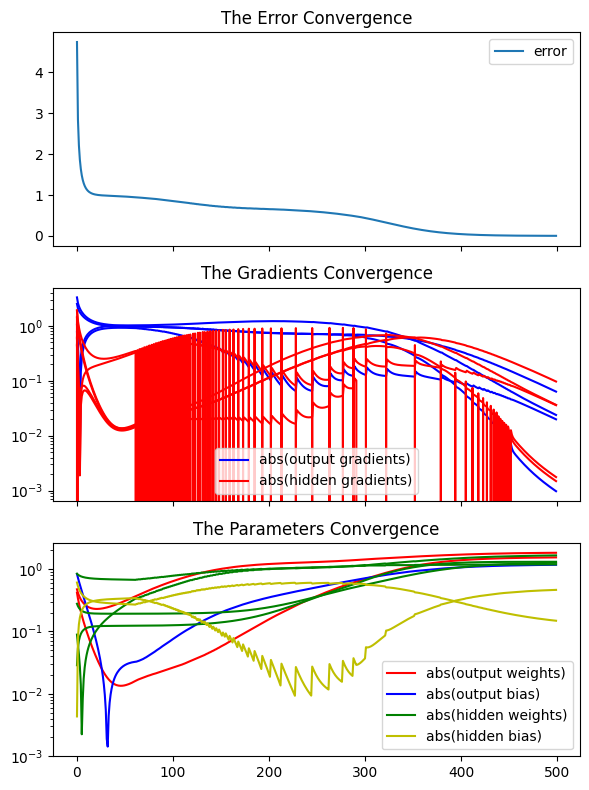

In [661]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True) 

df_grad_output = pd.DataFrame(best_grad_output)
df_grad_hidden = pd.DataFrame(best_grad_hidden)
df_w_output = pd.DataFrame(best_w_output)
df_b_output = pd.DataFrame(best_b_output)
df_w_hidden = pd.DataFrame(best_w_hidden)
df_b_hidden = pd.DataFrame(best_b_hidden)

pd.DataFrame(best_errors, columns=['error']).plot(ax=axes[0])

axes[1].plot(df_grad_output.abs(), c='b', label= 'abs(output gradients)')
axes[1].plot(df_grad_hidden.abs(), c='r', label='abs(hidden gradients)')

axes[2].plot(df_w_output.abs(), c='r', label='abs(output weights)')
axes[2].plot(df_b_output.abs(), c='b', label='abs(output bias)')
axes[2].plot(df_w_hidden.abs(), c='g', label='abs(hidden weights)' )
axes[2].plot(df_b_hidden.abs(), c='y', label='abs(hidden bias)' )

axes[0].set_title('The Error Convergence')
axes[1].set_title('The Gradients Convergence')
axes[2].set_title('The Parameters Convergence')

axes[1].legend()
handles, labels = axes[1].get_legend_handles_labels()  
axes[1].legend(dict(zip(labels, handles)).values(), dict(zip(labels, handles)).keys())
axes[1].set_yscale('log')

axes[2].legend()
handles, labels = axes[2].get_legend_handles_labels()  
axes[2].legend(dict(zip(labels, handles)).values(), dict(zip(labels, handles)).keys())
axes[2].set_yscale('log')

fig.tight_layout()